In [88]:
import pandas as pd
import numpy as np
import random
from sklearn.decomposition import PCA



from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [264]:
#read csv data

df = pd.read_csv("counts_splatter.csv")
df = df.transpose()

names = pd.read_csv("types_splatter.csv")
types_correct = list(names["Group"])

df.columns = list(df.iloc[0])
df = df.iloc[1:]

# Find highly variable genes

In [265]:
means = df.mean().values
var = df.var().values
means[means == 0] = 0.001

In [266]:
indices = var / means > 1

In [267]:
df_highly_var.loc[:,indices]

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,...,Gene4991,Gene4992,Gene4993,Gene4994,Gene4995,Gene4996,Gene4997,Gene4998,Gene4999,Gene5000
Cell1,7,0,0,11,6,3,0,0,2,6,...,15,5,8,0,0,329,0,0,0,8
Cell2,7,0,12,8,4,4,3,1,3,3,...,11,13,13,0,0,411,0,1,0,6
Cell3,4,1,11,4,6,7,0,2,1,5,...,14,9,5,0,0,257,0,1,0,1
Cell4,1,1,12,3,4,1,3,17,0,2,...,16,6,12,0,0,321,0,0,0,0
Cell5,6,0,10,4,4,2,0,4,1,0,...,8,8,7,0,0,395,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cell998,1,5,11,5,9,9,0,5,1,2,...,17,10,26,0,1,434,0,1,0,4
Cell999,1,2,10,0,2,1,0,4,0,1,...,8,8,22,1,0,276,0,1,0,4
Cell1000,2,2,10,5,2,9,0,3,0,1,...,17,4,12,0,0,352,2,2,0,3
mean,3.628,0.711,8.596,3.031,4.771,3.388,0.562,6.24,0.968,1.61,...,12.567,6.967,13.464,0.557,0.125,274.448,0.682,0.956,0.009,3.962


In [268]:

df = df.loc[:, indices]


In [269]:
df.insert(0, "cell_type", types_correct)


In [270]:
df

,cell_type,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,...,Gene4991,Gene4992,Gene4993,Gene4994,Gene4995,Gene4996,Gene4997,Gene4998,Gene4999,Gene5000
Cell1,Group2,0,0,0,9,4,2,4,4,3,...,276,13,4,0,0,0,0,1,2,1
Cell2,Group3,1,0,0,5,1,5,4,1,3,...,376,3,1,2,0,1,1,2,6,0
Cell3,Group4,0,2,0,6,1,4,0,0,3,...,186,6,2,0,0,0,0,1,5,0
Cell4,Group2,0,0,0,3,1,15,1,6,5,...,231,4,1,0,0,0,2,2,4,0
Cell5,Group5,0,0,1,9,2,6,2,6,3,...,460,3,8,0,0,0,0,2,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cell996,Group1,0,0,0,8,4,19,2,0,4,...,205,3,4,0,1,0,3,1,2,0
Cell997,Group2,0,0,0,12,1,4,3,3,2,...,383,5,2,0,0,0,4,2,1,0
Cell998,Group2,0,0,1,14,7,15,2,4,2,...,472,4,7,0,0,0,0,1,1,0
Cell999,Group2,0,2,0,6,0,6,1,5,3,...,562,5,9,2,0,1,3,1,6,0


# Plot TSNE

In [271]:
data_np = df.to_numpy()[:,1:].astype(float) #get rid of labels in the first 1 columns

In [272]:

lib_size = np.sum(data_np, axis = 1) # total expression value per cell, i.e. sum over genes

tmp = np.repeat(lib_size, np.shape(data_np)[1]).reshape(np.shape(data_np)) # does the correct thing
data_np = np.log(data_np / tmp * 1e4 + 1)

In [273]:
# centering

N = np.shape(data_np)[0] # total number of cells
mu_g = np.sum(data_np, axis = 0) / N  


total_diff_g = np.max(data_np, axis=0) - np.min(data_np, axis=0)


total_diff_g[total_diff_g == 0] = 1e5 # preferably sth big to counteract possible numerical error

data_z_norm = (data_np - mu_g) #/ total_diff_g

## PCA dimension reduction

In [274]:
def do_PCA(n_dimensions=5):
    pca = PCA(n_dimensions)
    principalComponents = pca.fit_transform(data_z_norm) # data_z_norm is already centered
    print(pca.explained_variance_ratio_)
    return principalComponents



## create t-SNE plot

In [275]:
PC_tsne = do_PCA(5)

n_components = 2
tsne = TSNE(n_components, perplexity=15)#, perplexity=45
# Apparently, it is common to first do a PCA and then t-SNE
red_data= tsne.fit_transform(PC_tsne) #PC_tsne has shape (n_samples, n_features= PCA features)



[0.04123917 0.02520306 0.0124097  0.00220415 0.00217063]


['Group1' 'Group2' 'Group3' 'Group4' 'Group5']


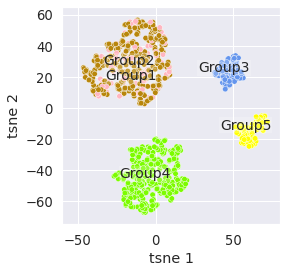

In [285]:
sns.set(font_scale=1.2)
red_data_df = pd.DataFrame({'tsne_1': red_data[:,0], 'tsne_2': red_data[:,1], 'label': df['cell_type'][:]})
#red_data_df = pd.DataFrame({'PCA_1': PC_tsne[:,0], 'PCA_2': PC_tsne[:,1], 'label': df['cell_type'][:]})
fig, ax = plt.subplots(1)
colors1 = ['darkgoldenrod', 'cornflowerblue', 'lawngreen', 'yellow', 'lightpink']#, 'mediumblue', 'orange', 'peru', 'deeppink']
colors2 = []
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=red_data_df, legend=False, ax=ax,s=30, palette=colors1)
#sns.scatterplot(x='PCA_1', y='PCA_2', hue='label', data=red_data_df, legend='full', ax=ax,s=30, palette=colors1)
lim_x = (-60, 80)
lim_y = (-75, 65)
#lim = (-10,10)
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
ax.set_aspect('equal')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
ax.set(xlabel='tsne 1')
ax.set(ylabel='tsne 2')

txts = []

labels = np.unique(red_data_df['label'].values)
print(labels)
for i in labels:

    # Position of each label at median of data points.

    xtext = np.median(red_data_df[red_data_df['label'] == i]['tsne_1'].values) - 20
    ytext = np.median(red_data_df[red_data_df['label'] == i]['tsne_2'].values)

    if i == 'Group1':
        ytext -= 8
    
    txt = ax.text(xtext, ytext, str(i), fontsize=14,bbox={'facecolor':'white','alpha':0.2,'edgecolor':'none','pad':1, 'linewidth':10})
   

    txts.append(txt)

fig.savefig('tSNE_splatter.png', format='PNG', dpi=300,  bbox_inches='tight')

# specific form subject to lots of parameters, e.g. perplexity. Only disconnected qNSC1 for perplexity=15 for instance. For 10, we find that NB are disconnected

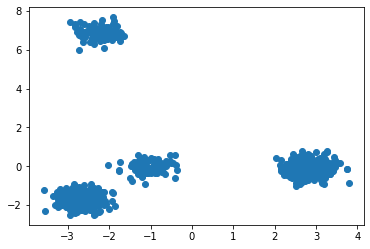

In [150]:
plt.scatter(PC_tsne[:,0], PC_tsne[:,1])

In [103]:
np.shape(PC_tsne)

(1000, 10)

# Create dummy rows so that it's applicable to be read by our script

In [279]:
#create dummy columns; don't need to alter pre-processing steps from my other script
df.insert(0, "Unnamed: 0", "") 
df.insert(0, "sample", "") 

#df.insert(0, "dummy", np.arange(len(df)))
df.set_index("sample", inplace = True)

df.to_csv("genes_splatter.csv")